<a href="https://colab.research.google.com/github/ucfilho/ANN_raianars/blob/master/ANN_parte_013_M%C3%A9tricas_OUT_07_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Nome='sigmoide'
Nome='tasig'
#Saida='purelin'
Saida='limitado'

# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

Cloning into 'ANN'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 70 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (70/70), done.
/content/ANN
Hello world
I'm evolving!!!



In [0]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb

In [3]:
!ls

000_ANN_Gera_Matriz_out_04_2019.ipynb		    X_DAT_B_set_17_2019.csv
000_ANN_parte_001_XY_dados_out_01_2019.ipynb	    X_DAT_set_17_2019.csv
000_ANN_parte_002_XY_Métricas_D10_OUT_4_2019.ipynb  XY_D10_30_out_7_2019.csv
000_ANN_parte_009_Métricas_PCA_OUT_07_2019.ipynb    XY_D10_out_1_2019.csv
000_Gerenciador_DE_var_F_CR_STAT_set_27_2019.ipynb  XY_D10_out_5_2019.csv
imput_ANN_D10_30_out_07_19.zip			    Y_DAT_B_set_17_2019.csv
imput_ANN_D10_6F.zip				    Y_DAT_set_17_2019.csv
imput_ANN_D10_out_05_19.zip


In [0]:
# sigmoid function
def afun(nome,x,deriv=False):

  if(nome=='sigmoide'):
    if(deriv==True):
      return x*(1-x)
    return 1/(1+np.exp(-x))

  if(nome=='tasig'):
    if(deriv==True):
        return 1-x*x
    return 2/(1+np.exp(-2*x))-1

  if(nome=='purelin'):
    # Leaky ReLUs
    if(deriv==True):
      return 1
    return x

  if(nome=='limitado'):
    # Leaky ReLUs https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
     N=len(x)
     for i in range(N):
       if (x[i]>1):
         if(deriv==True):
           x[i]=1
         else:
           x[i]=1  
       else:
         if(deriv==True):
           x[i]=1

       if (x[i]<-1):
         if(deriv==True):
           x[i]=1
         else:
           x[i]=-0.9 


     return x
    

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
def ANN(Epoch,Nome,Saida,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,X_train,y):
  syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
  syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1
  for j in range(Epoch):
    l0 = X_train
    l1 = afun(Nome,np.dot(l0,syn0))
    l2 = afun(Saida,np.dot(l1,syn1))
    l2_error = y - l2
    #l2_delta = l2_error*afun('purelin',l2,deriv=True)
    l2_delta = l2_error*afun(Saida,l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * afun(Nome,l1,deriv=True)
    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate
  return syn0,syn1



In [0]:
def ANN_ycal(Nome,Saida,syn0,syn1,X_train):
  l0 = X_train
  l1 = afun(Nome,np.dot(l0,syn0))
  l2 = afun(Saida,np.dot(l1,syn1))
  y_calc=np.reshape(l2,len(l2))
  return y_calc

In [0]:
def QUALIDADE(yobs,ycal):
  #yobs=yobs.to_numpy()
  yobs=np.array(yobs)
  #ycal=ycal.to_numpy()
  ycal=np.array(ycal)
  N=len(yobs)
  Soma=0
  for i in range(N):
    Soma=Soma+(yobs[i]-ycal[i])**2
  Soma=(Soma/N)**0.5
  return Soma


In [0]:
def R2(yobs,ycal):
  yobs=np.array(yobs)
  ycal=np.array(ycal)
  N=len(yobs)
  SQresiduos=0
  SQexp=0
  ycal_medio=ycal.mean().item()
  for i in range(N):
    SQresiduos=SQresiduos+(yobs[i]-ycal[i])**2
    SQexp=SQexp+(ycal[i]-ycal_medio)**2
  coef=1-(SQresiduos/SQexp)
  return coef

In [0]:
# leitura dos dados
DAT=pd.read_csv("XY_D10_30_out_7_2019.csv")
#print(DAT.head())

In [12]:
# separa as colunas de interesse
Index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
#print(Dat_Select)
print(Dat_Select.head())

   DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         19.479761     1.081077       0.2         2.0      2.0  100.0   
1         19.667582     1.091500       0.3         2.0      2.0  100.0   
2         19.957668     1.107599       0.4         0.0      0.0  100.0   
3         20.617404     1.144213       0.5         0.0      0.0  100.0   
4         19.455278     1.079718       0.6         2.0      2.0  100.0   

         Fo       CRo      fmin        fmax   AD_fmin   AD_fmax  DELTA FOBJ  \
0  0.798558  0.531855  0.146353  231.984278  0.117215  0.017040         2.0   
1  0.618503  0.966139  0.004995   90.568405  0.004001  0.006653         0.0   
2  0.627984  0.944441  0.004995   84.874065  0.004001  0.006234        -2.0   
3  0.894793  0.571047  0.004995    3.558598  0.004001  0.000261         0.0   
4  0.901544  0.852554  0.000030    0.144926  0.000024  0.000011         2.0   

   DELTA VX  r_fitness         F        CR  
0       2.0   0.999369  0.618503  0

In [0]:
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [14]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) 
test=DAT.drop(train.index)
IND=[1,2,3,4,6,7,8,9,10,11,12,13,14]
x_train=train.iloc[:,IND]
x_test=test.iloc[:,IND]
X_OLD=DAT_OLD.iloc[:,IND]
X_NOME=DAT_OLD.columns[IND]
print(X_NOME)


Index(['DI RELATIVO', 'FRAC Its', 'VELOC FOBJ', 'VELOC X', 'Fo', 'CRo', 'fmin',
       'fmax', 'AD_fmin', 'AD_fmax', 'DELTA FOBJ', 'DELTA VX', 'r_fitness'],
      dtype='object')


In [0]:
# obtem as variaveis dependentes (treino e teste)
Index=[15] #F
#Index=[16] #CR
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
#print(y_train.head())

In [0]:
y_train=np.array(y_train)
x_test=np.array(x_test)
x_train=np.array(x_train)

In [0]:
# input dataset
Neuron_input=len(X_NOME)
Neuron_hidden=9
Neuron_output=1
Learning_rate=0.001
omega=0.9
Epoch=200000
#Nome='sigmoide'
syn0,syn1=ANN(Epoch,Nome,Saida,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,x_train,y_train)
y_obs_train=y_train
y_calc_train=ANN_ycal(Nome,Saida,syn0,syn1,x_train)
Erro_treino=QUALIDADE(y_obs_train,y_calc_train)

y_obs_test=y_test
y_calc_test=ANN_ycal(Nome,Saida,syn0,syn1,x_test)
Erro_teste=QUALIDADE(y_obs_test,y_calc_test)

R2_treino=R2(y_obs_train,y_calc_train)
#print("RMSE treino=",Erro_treino, 'R2_treino',R2_treino,"Epocas=",Epoch,"Learning=",Learning_rate)
Erro_teste=QUALIDADE(y_obs_test,y_calc_test)
R2_teste=R2(y_obs_test,y_calc_test)
#print("RMSE teste=",Erro_teste,'R2_teste',R2_teste,"Epocas=",Epoch,"Learning=",Learning_rate)

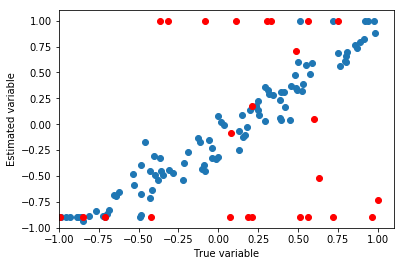

Index(['DI RELATIVO', 'FRAC Its', 'VELOC FOBJ', 'VELOC X', 'Fo', 'CRo', 'fmin',
       'fmax', 'AD_fmin', 'AD_fmax', 'DELTA FOBJ', 'DELTA VX', 'r_fitness'],
      dtype='object')
RMSE treino= [0.1821221] R2_treino [0.89715004] Epocas= 200000 Learning= 0.001
RMSE teste= [1.00700621] R2_teste [-0.40360774] Epocas= 200000 Learning= 0.001


In [18]:
plt.scatter(y_obs_train,y_calc_train)
plt.scatter(y_obs_test,y_calc_test,color='r')
plt.xlabel("True variable")
plt.ylabel("Estimated variable")

y_test_max=y_calc_test.max()
y_test_min=y_calc_test.min()
min=y_test_min.item()-0.1
if y_test_max.item()>1:
  max=y_test_max.item()+0.1
else:
  max=1.1

plt.xlim((min,max))
plt.ylim((min,max))
plt.show()
print(X_NOME)
print("RMSE treino=",Erro_treino, 'R2_treino',R2_treino,"Epocas=",Epoch,"Learning=",Learning_rate)
print("RMSE teste=",Erro_teste,'R2_teste',R2_teste,"Epocas=",Epoch,"Learning=",Learning_rate)


In [0]:
# input dataset
Neuron_input=len(X_NOME)
Neuron_hidden=9
Neuron_output=1
Learning_rate=0.0001
omega=0.9
Epoch=200000
#Nome='sigmoide'
syn0,syn1=ANN(Epoch,Nome,Saida,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,x_train,y_train)
y_obs_train=y_train
y_calc_train=ANN_ycal(Nome,Saida,syn0,syn1,x_train)
Erro_treino=QUALIDADE(y_obs_train,y_calc_train)
y_obs_test=y_test
y_calc_test=ANN_ycal(Nome,Saida,syn0,syn1,x_test)
Erro_teste=QUALIDADE(y_obs_test,y_calc_test)
R2_treino=R2(y_obs_train,y_calc_train)
#print("RMSE treino=",Erro_treino, 'R2_treino',R2_treino,"Epocas=",Epoch,"Learning=",Learning_rate)
Erro_teste=QUALIDADE(y_obs_test,y_calc_test)
R2_teste=R2(y_obs_test,y_calc_test)
#print("RMSE teste=",Erro_teste,'R2_teste',R2_teste,"Epocas=",Epoch,"Learning=",Learning_rate)


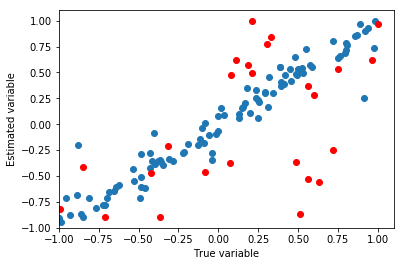

Index(['DI RELATIVO', 'FRAC Its', 'VELOC FOBJ', 'VELOC X', 'Fo', 'CRo', 'fmin',
       'fmax', 'AD_fmin', 'AD_fmax', 'DELTA FOBJ', 'DELTA VX', 'r_fitness'],
      dtype='object')
RMSE treino= [0.13782639] R2_treino [0.93292004] Epocas= 200000 Learning= 0.0001
RMSE teste= [0.60402366] R2_teste [0.08184113] Epocas= 200000 Learning= 0.0001


In [20]:
plt.scatter(y_obs_train,y_calc_train)
plt.scatter(y_obs_test,y_calc_test,color='r')
plt.xlabel("True variable")
plt.ylabel("Estimated variable")

y_test_max=y_calc_test.max()
y_test_min=y_calc_test.min()
min=y_test_min.item()-0.1
if y_test_max.item()>1:
  max=y_test_max.item()+0.1
else:
  max=1.1

plt.xlim((min,max))
plt.ylim((min,max))
plt.show()
print(X_NOME)
print("RMSE treino=",Erro_treino, 'R2_treino',R2_treino,"Epocas=",Epoch,"Learning=",Learning_rate)
print("RMSE teste=",Erro_teste,'R2_teste',R2_teste,"Epocas=",Epoch,"Learning=",Learning_rate)

In [21]:
print(X_NOME)

Index(['DI RELATIVO', 'FRAC Its', 'VELOC FOBJ', 'VELOC X', 'Fo', 'CRo', 'fmin',
       'fmax', 'AD_fmin', 'AD_fmax', 'DELTA FOBJ', 'DELTA VX', 'r_fitness'],
      dtype='object')


In [22]:
# ========= Novas mudancas ==================================================
IND=[1,2,6,7]
x_train=train.iloc[:,IND]
x_test=test.iloc[:,IND]
X_OLD=DAT_OLD.iloc[:,IND]
X_NOME=DAT_OLD.columns[IND]
print(X_NOME)
y_train=np.array(y_train)
x_test=np.array(x_test)
x_train=np.array(x_train)

Index(['DI RELATIVO', 'FRAC Its', 'Fo', 'CRo'], dtype='object')


In [0]:
# input dataset
Neuron_input=len(X_NOME)
Neuron_hidden=9
Neuron_output=1
Learning_rate=0.0001
omega=0.9
Epoch=300000
#Nome='sigmoide'
syn0,syn1=ANN(Epoch,Nome,Saida,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,x_train,y_train)
y_obs_train=y_train
y_calc_train=ANN_ycal(Nome,Saida,syn0,syn1,x_train)
Erro_treino=QUALIDADE(y_obs_train,y_calc_train)
y_obs_test=y_test
y_calc_test=ANN_ycal(Nome,Saida,syn0,syn1,x_test)
Erro_teste=QUALIDADE(y_obs_test,y_calc_test)
R2_treino=R2(y_obs_train,y_calc_train)
#print("RMSE treino=",Erro_treino, 'R2_treino',R2_treino,"Epocas=",Epoch,"Learning=",Learning_rate)
Erro_teste=QUALIDADE(y_obs_test,y_calc_test)
R2_teste=R2(y_obs_test,y_calc_test)


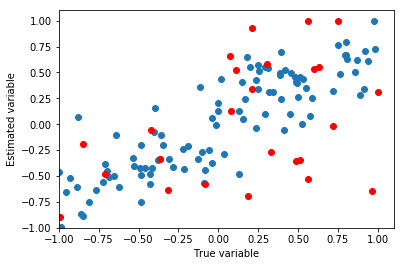

Index(['DI RELATIVO', 'FRAC Its', 'Fo', 'CRo'], dtype='object')
RMSE treino= [0.28059558] R2_treino [0.64545432] Epocas= 300000 Learning= 0.0001
RMSE teste= [0.6245202] R2_teste [-0.1978468] Epocas= 300000 Learning= 0.0001


In [24]:
plt.scatter(y_obs_train,y_calc_train)
plt.scatter(y_obs_test,y_calc_test,color='r')
plt.xlabel("True variable")
plt.ylabel("Estimated variable")

y_test_max=y_calc_test.max()
y_test_min=y_calc_test.min()
min=y_test_min.item()-0.1
if y_test_max.item()>1:
  max=y_test_max.item()+0.1
else:
  max=1.1

plt.xlim((min,max))
plt.ylim((min,max))
plt.show()
print(X_NOME)
print("RMSE treino=",Erro_treino, 'R2_treino',R2_treino,"Epocas=",Epoch,"Learning=",Learning_rate)
print("RMSE teste=",Erro_teste,'R2_teste',R2_teste,"Epocas=",Epoch,"Learning=",Learning_rate)